In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df = pd.read_csv("data/NY.csv")
df

C:\Users\shrey\AppData\Local\Temp\ipykernel_14036\2146983840.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/NY.csv")


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,"5,333.90","4,818.42"
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,"4,865.99","4,588.78"
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,"5,901.54","5,559.56"
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,"3,619.08","3,567.25"
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,"3,185.87","3,167.89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,N,Y,"43,494.00","5,588.26"
2346927,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,"16,662.00","2,907.62"
2346928,NaN,NaN,NaN,NaN,Redacted for Confidentiality,50 to 69,NaN,M,White,Unknown,...,Minor,Medical,Medicaid,NaN,NaN,0,N,N,"7,142.00","1,692.55"
2346929,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Blue Cross/Blue Shield,0,N,Y,"13,070.00","2,447.75"


In [14]:
df.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [4]:
facility = df["Facility Name"].unique()
len(facility)

224

In [9]:
for i in facility:
    print(df[df["Facility Name"] == i].shape[0])

61
5464
2037
5906
1086
13020
16237
2461
5704
1177
11
22872
4985
15301
7984
5351
14130
4497
981
3952
4693
3762
310
2813
1764
5314
1245
2242
11024
18778
29798
16743
530
2272
38653
3839
587
5643
17223
24
5738
2342
600
4721
5338
810
592
739
700
146
4343
10877
3907
9683
3891
9970
13318
1635
731
16006
25640
1018
109
3267
1410
1427
8286
21370
22433
3991
394
3046
2314
5237
7237
36281
82
607
25971
7
2897
5825
2918
6716
9695
6388
9218
9817
14366
123
173
2373
376
2209
143
331
186
2550
3550
14072
21732
2300
5636
10291
472
2007
5725
5113
22620
3933
6785
13459
2592
1955
16222
4282
3038
264
50
8040
517
7772
15338
4944
3078
7810
261
2247
4777
9736
10195
21470
3178
7963
7300
5135
6203
956
613
19189
4609
17420
42694
22860
2981
14620
7277
27369
28960
14788
14957
14880
24425
7085
19653
41858
5697
39749
181
8669
7867
13278
13351
12148
26317
10467
3887
6002
12126
34551
6557
31337
15075
12604
22378
265
55874
43148
33098
373
47495
19790
4587
21111
16315
12831
760
11892
23655
40858
12928
8676
14357
2411
14199


In [25]:
df['Length of Stay'] = df['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])

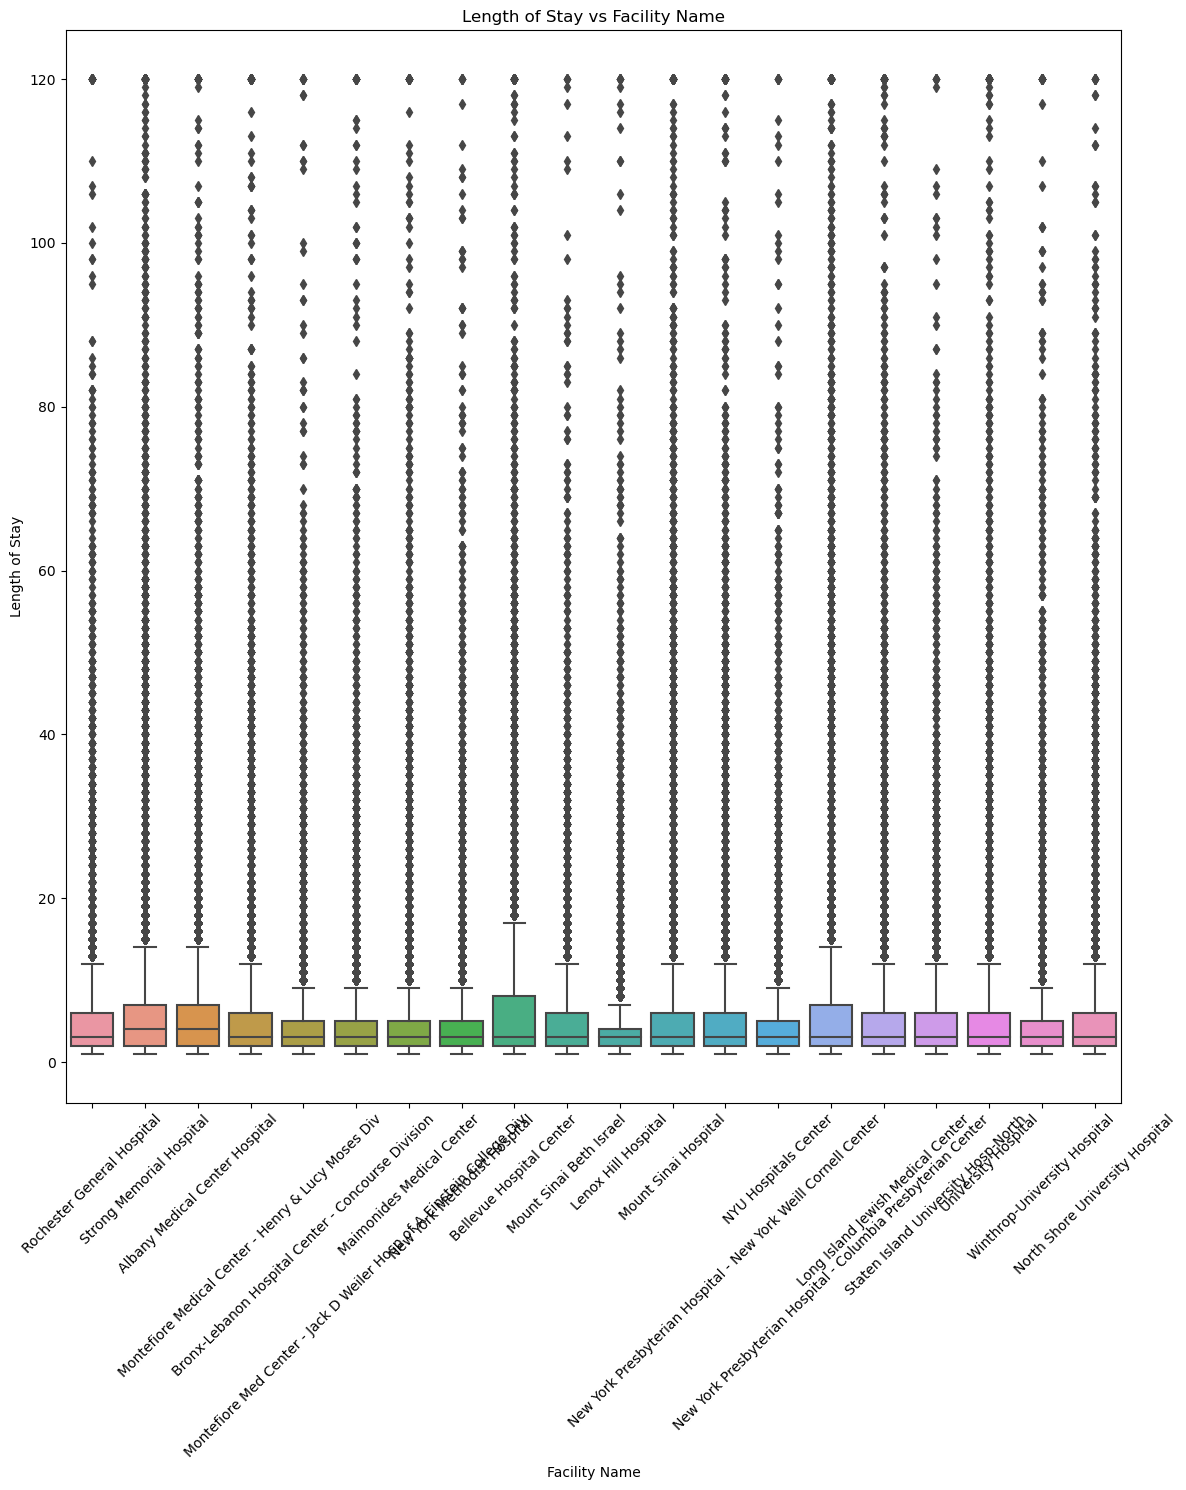

In [11]:
top_n = 20

# Get the top N categories based on frequency or numerical values
top_categories = df['Facility Name'].value_counts().nlargest(top_n).index

# Filter the data to include only the top N categories
filtered_data = df[df['Facility Name'].isin(top_categories)]

# Plot the bar graph
plt.figure(figsize=(12, 15))
sns.boxplot(x='Facility Name', y='Length of Stay', data=filtered_data)
plt.xticks(rotation=45)
plt.xlabel('Facility Name')
plt.ylabel('Length of Stay')
plt.title('Length of Stay vs Facility Name')
plt.tight_layout()
plt.show()

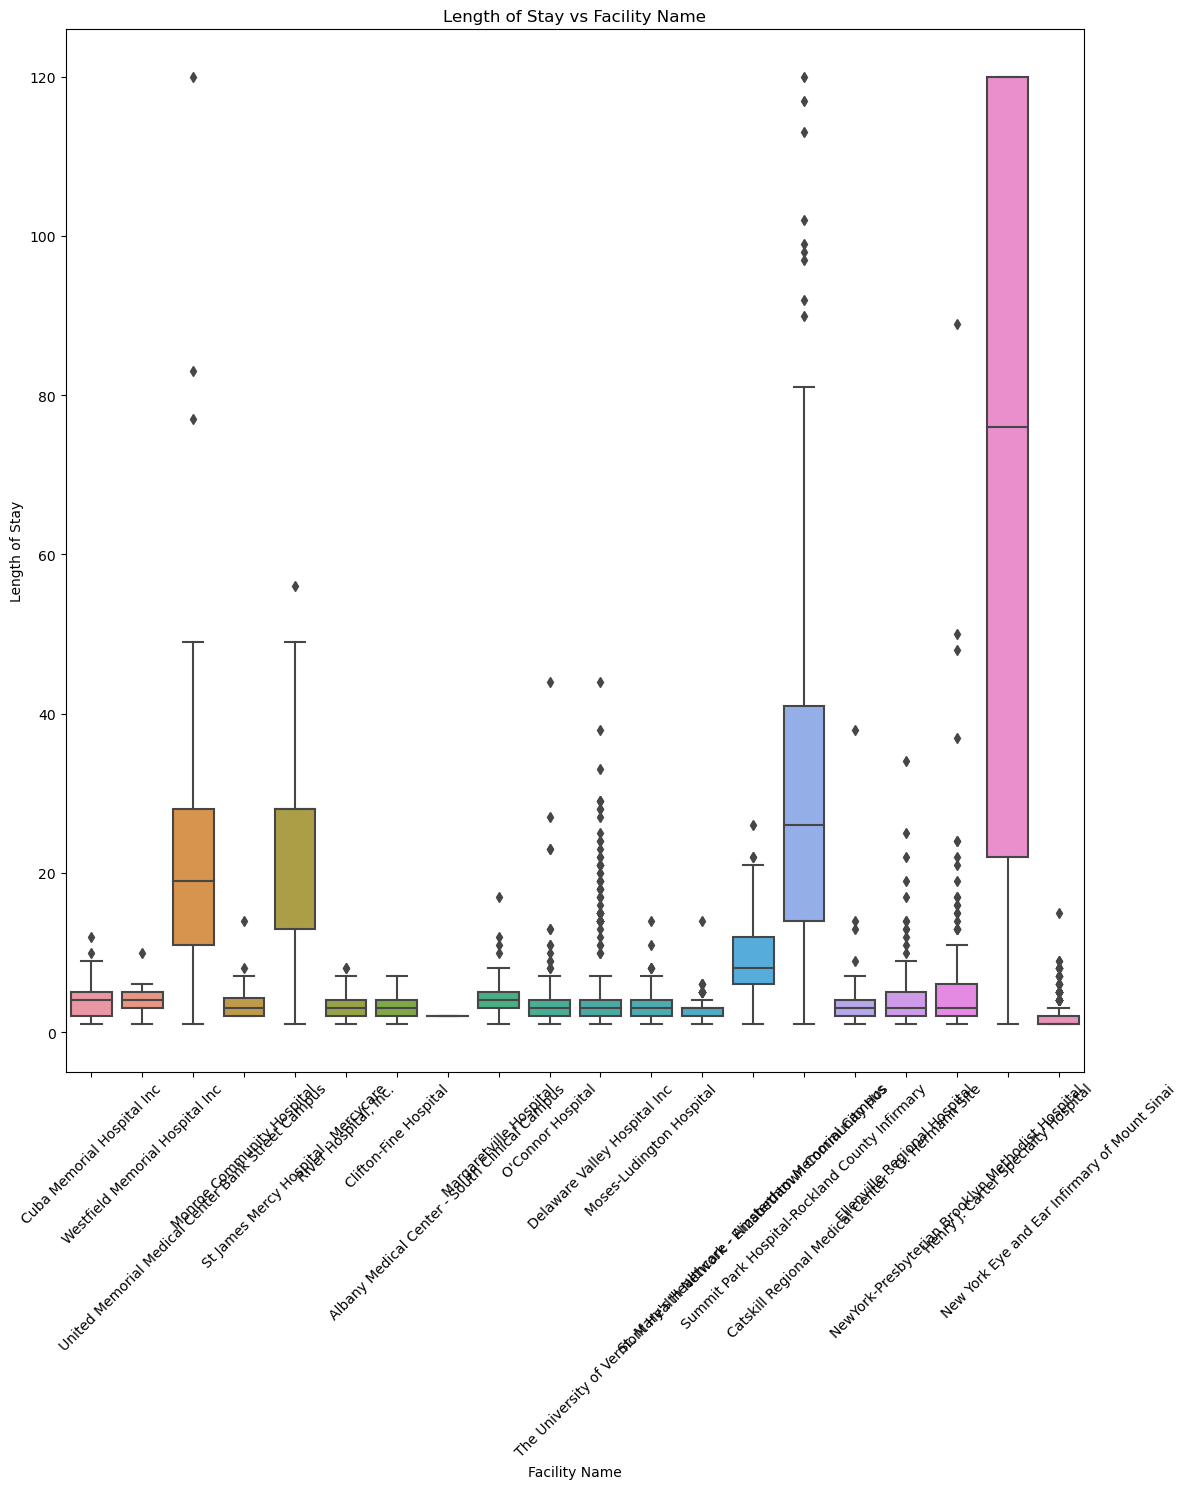

In [12]:
bottom_n = 20

# Get the top N categories based on frequency or numerical values
top_categories = df['Facility Name'].value_counts().nsmallest(bottom_n).index

# Filter the data to include only the top N categories
filtered_data = df[df['Facility Name'].isin(top_categories)]

# Plot the bar graph
plt.figure(figsize=(12, 15))
sns.boxplot(x='Facility Name', y='Length of Stay', data=filtered_data)
plt.xticks(rotation=45)
plt.xlabel('Facility Name')
plt.ylabel('Length of Stay')
plt.title('Length of Stay vs Facility Name')
plt.tight_layout()
plt.show()

In [13]:
# Calculate the IQR for each category
iqr_per_category = df.groupby('Facility Name')['Length of Stay'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Print the IQR for each category
for i in iqr_per_category:
    print(i)
print("average",iqr_per_category.mean())

3.0
0.0
5.0
4.0
2.0
3.0
3.0
3.0
6.0
2.0
41.0
4.0
3.0
12.0
5.0
5.0
4.0
2.0
5.0
25.0
3.0
1.0
3.0
2.0
3.0
2.0
5.0
6.0
2.0
2.0
4.0
2.0
6.0
2.0
3.0
3.0
15.0
3.0
4.0
2.0
6.0
5.0
3.0
4.0
1.0
5.0
6.0
3.0
3.0
3.0
3.0
4.0
4.0
6.0
4.0
4.0
3.0
2.0
4.0
4.0
7.0
10.0
98.0
2.0
2.0
3.0
4.0
7.0
2.0
5.0
3.0
5.0
3.0
5.0
7.0
2.0
2.0
3.0
3.0
4.0
1.0
4.0
3.0
3.0
2.0
4.0
2.0
4.0
2.0
5.0
4.0
3.0
5.0
4.0
5.0
2.0
2.25
3.0
4.0
3.0
6.0
3.0
2.0
4.0
5.0
5.0
4.0
4.0
2.0
6.0
2.0
3.0
3.0
3.0
3.0
3.0
2.0
4.0
1.0
4.0
3.0
3.0
5.0
4.0
8.0
4.0
2.0
4.0
4.0
3.0
3.0
4.0
2.0
4.0
2.0
4.0
4.0
2.0
2.0
3.0
2.0
3.0
2.0
4.0
3.0
6.0
3.0
3.0
5.0
4.0
3.0
4.0
8.0
2.0
4.0
2.0
4.0
3.0
5.0
3.0
2.0
2.0
4.0
5.0
3.0
4.0
2.0
2.0
4.0
3.0
4.0
2.0
3.0
3.0
5.0
4.0
4.0
6.0
2.0
15.0
6.0
11.0
6.0
8.0
4.0
3.0
3.0
4.0
3.0
6.0
4.0
16.0
4.0
3.0
5.0
27.0
10.0
4.0
3.0
1.0
4.0
8.0
4.0
1.0
3.0
6.0
4.0
17.0
2.0
4.0
5.0
4.0
3.0
7.0
2.0
3.0
12.0
3.0
4.0
4.0
1.0
5.0
3.0
4.0
average 4.751116071428571


In [4]:
print("Average length of stay", df["Length of Stay"].mean())

Average length of stay 5.476420908837968


In [7]:
df.corr()

C:\Users\shrey\AppData\Local\Temp\ipykernel_17248\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Operating Certificate Number,Facility Id,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight
Operating Certificate Number,1.000000,0.671680,0.019859,NaN,0.037563,0.182436,0.042084,0.043269,-0.040327,0.016563
Facility Id,0.671680,1.000000,0.004760,NaN,0.023683,0.165151,0.050094,0.048113,-0.048922,0.064901
Length of Stay,0.019859,0.004760,1.000000,NaN,0.112375,0.042062,0.073509,0.101832,0.346428,-0.094245
Discharge Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCS Diagnosis Code,0.037563,0.023683,0.112375,NaN,1.000000,0.117448,0.440195,0.460168,-0.192200,0.055631
CCS Procedure Code,0.182436,0.165151,0.042062,NaN,0.117448,1.000000,0.193728,0.190169,-0.016663,0.160949
APR DRG Code,0.042084,0.050094,0.073509,NaN,0.440195,0.193728,1.000000,0.968579,-0.107333,0.295980
APR MDC Code,0.043269,0.048113,0.101832,NaN,0.460168,0.190169,0.968579,1.000000,-0.097510,0.250306
APR Severity of Illness Code,-0.040327,-0.048922,0.346428,NaN,-0.192200,-0.016663,-0.107333,-0.097510,1.000000,-0.262235
Birth Weight,0.016563,0.064901,-0.094245,NaN,0.055631,0.160949,0.295980,0.250306,-0.262235,1.000000


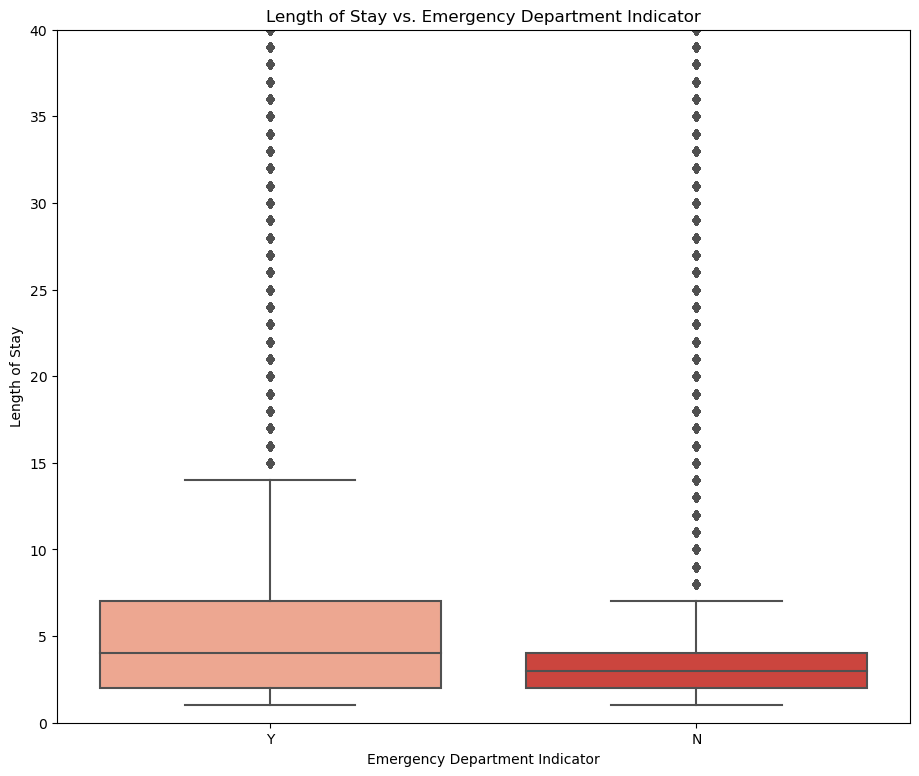

In [8]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Emergency Department Indicator", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Emergency Department Indicator')
plt.show()

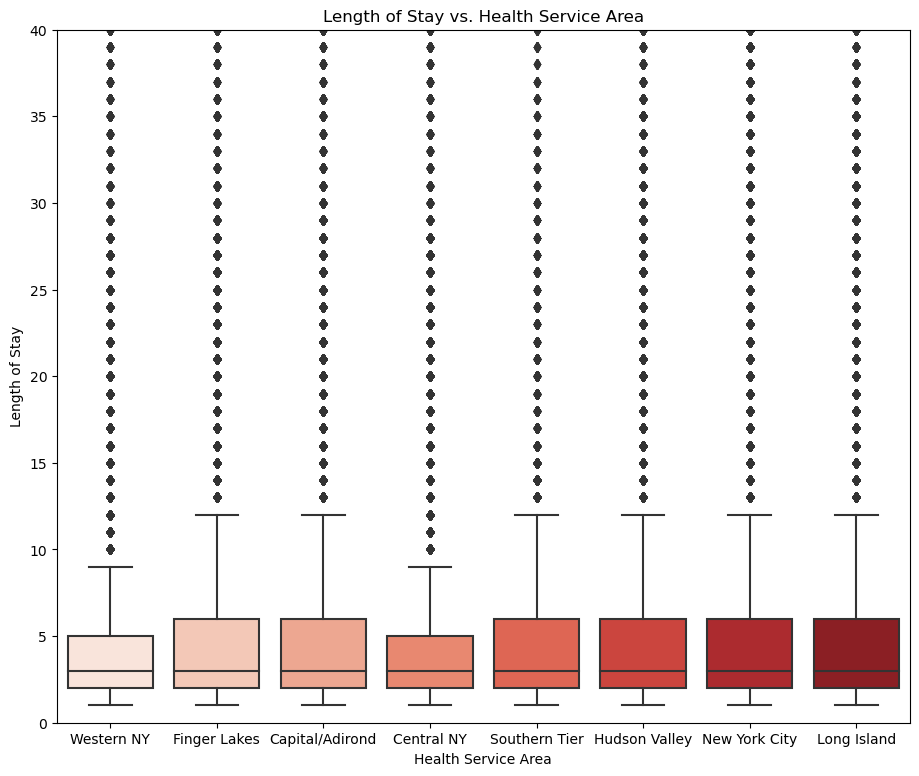

In [9]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Health Service Area", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Health Service Area')
plt.show()

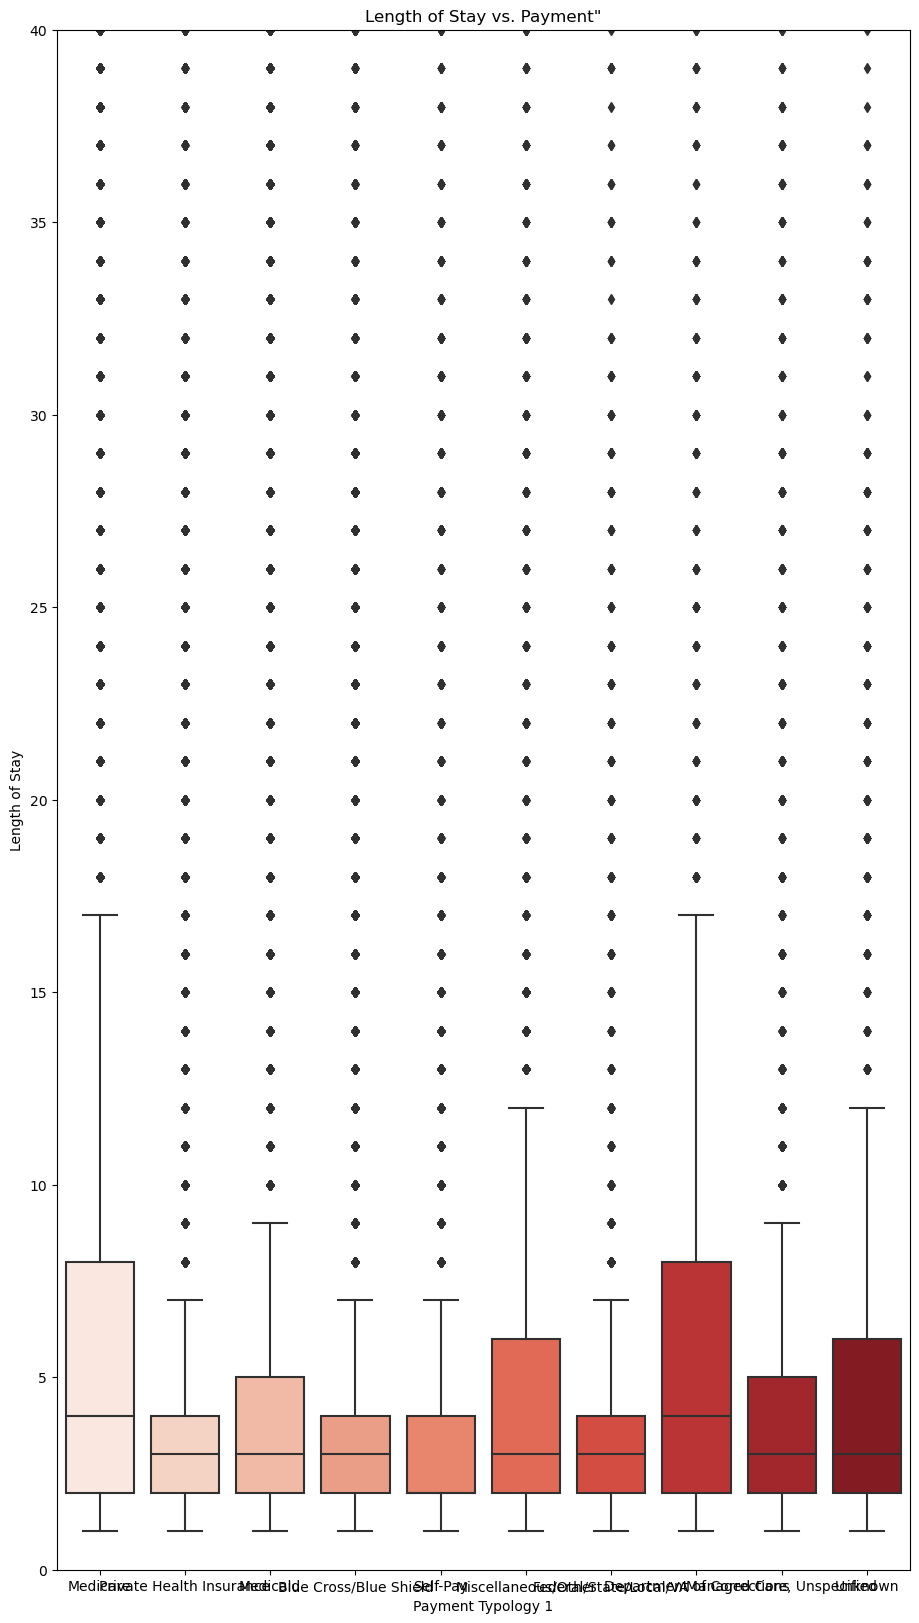

In [18]:
f, ax = plt.subplots(figsize=(11, 20))
sns.boxplot(x="Payment Typology 1", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Payment"')
plt.show()

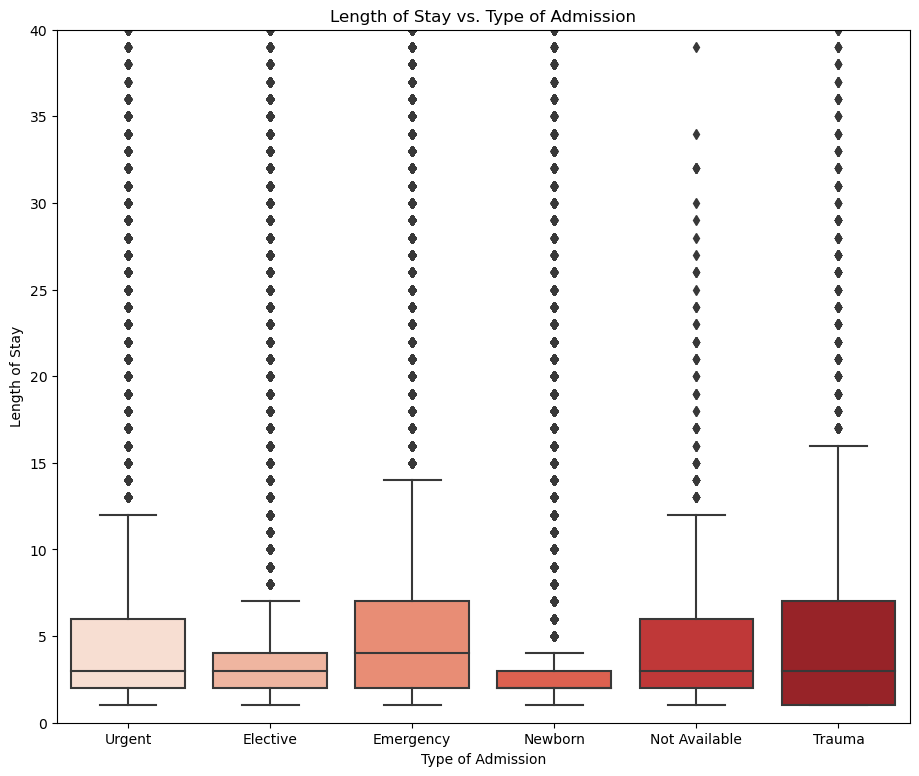

In [10]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Type of Admission')
plt.show()

In [26]:
df = df.drop(["Facility Id", "Total Charges", "Total Costs", "Health Service Area", "Hospital County"], axis = 1)
df = df.drop(["Zip Code - 3 digits", "Race", "Ethnicity", "Discharge Year", "Patient Disposition", "Birth Weight", "Payment Typology 3", "Payment Typology 2", "Operating Certificate Number"], axis = 1)

In [27]:
df = df.drop(["Facility Name", "Gender", "CCS Diagnosis Description", "CCS Procedure Description", "APR DRG Description", "APR MDC Description", "APR Severity of Illness Description", "APR Medical Surgical Description", "Abortion Edit Indicator"], axis = 1)

In [6]:
df.dtypes

Age Group                         object
Length of Stay                     int64
Type of Admission                 object
CCS Diagnosis Code                 int64
CCS Procedure Code                 int64
APR DRG Code                       int64
APR MDC Code                       int64
APR Severity of Illness Code       int64
APR Risk of Mortality             object
Payment Typology 1                object
Emergency Department Indicator    object
dtype: object

In [28]:
df = df.dropna(subset=['APR Risk of Mortality'])

In [29]:
mort_string_index = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_string_index = {'0 to 17': 1, '18 to 29': 2, '30 to 49': 3, '50 to 69': 4, '70 or Older': 5}

df['Age Group'] = df['Age Group'].apply(lambda x: age_string_index[x])
df['APR Risk of Mortality'] = df['APR Risk of Mortality'].apply(lambda x: mort_string_index[x])
display(df)

,Age Group,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator
0,5,4,Urgent,122,0,139,4,2,1,Medicare,Y
1,5,4,Elective,55,0,422,10,2,2,Medicare,Y
2,5,4,Urgent,122,202,139,4,1,1,Medicare,Y
3,4,2,Elective,55,0,249,6,2,1,Medicare,Y
4,5,2,Elective,122,0,139,4,1,2,Medicare,Y
...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,Emergency,112,0,47,1,2,2,Medicare,Y
2346927,4,1,Emergency,54,159,351,8,1,1,Private Health Insurance,Y
2346928,4,2,Urgent,657,0,751,19,1,1,Medicaid,N
2346929,5,1,Emergency,106,0,201,5,1,2,Medicare,Y


In [30]:
df = pd.get_dummies(df)
df

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Federal/State/Local/VA,"Payment Typology 1_Managed Care, Unspecified",Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y
0,5,4,122,0,139,4,2,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5,4,55,0,422,10,2,2,1,0,...,0,0,0,1,0,0,0,0,0,1
2,5,4,122,202,139,4,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,2,55,0,249,6,2,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,5,2,122,0,139,4,1,2,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,0,0,1,0,0,0,0,0,1
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1
2346928,4,2,657,0,751,19,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2346929,5,1,106,0,201,5,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1


In [32]:
new_df = df.copy()
new_df

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Federal/State/Local/VA,"Payment Typology 1_Managed Care, Unspecified",Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y
0,5,4,122,0,139,4,2,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5,4,55,0,422,10,2,2,1,0,...,0,0,0,1,0,0,0,0,0,1
2,5,4,122,202,139,4,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,2,55,0,249,6,2,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,5,2,122,0,139,4,1,2,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,0,0,1,0,0,0,0,0,1
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1
2346928,4,2,657,0,751,19,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2346929,5,1,106,0,201,5,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1


### 3 bins 0, 5, 120

In [30]:
bins = [0,5,120]
labels = [5,120]
new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(new_df)

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 5],5
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 5],5
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 5],5
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 5],5


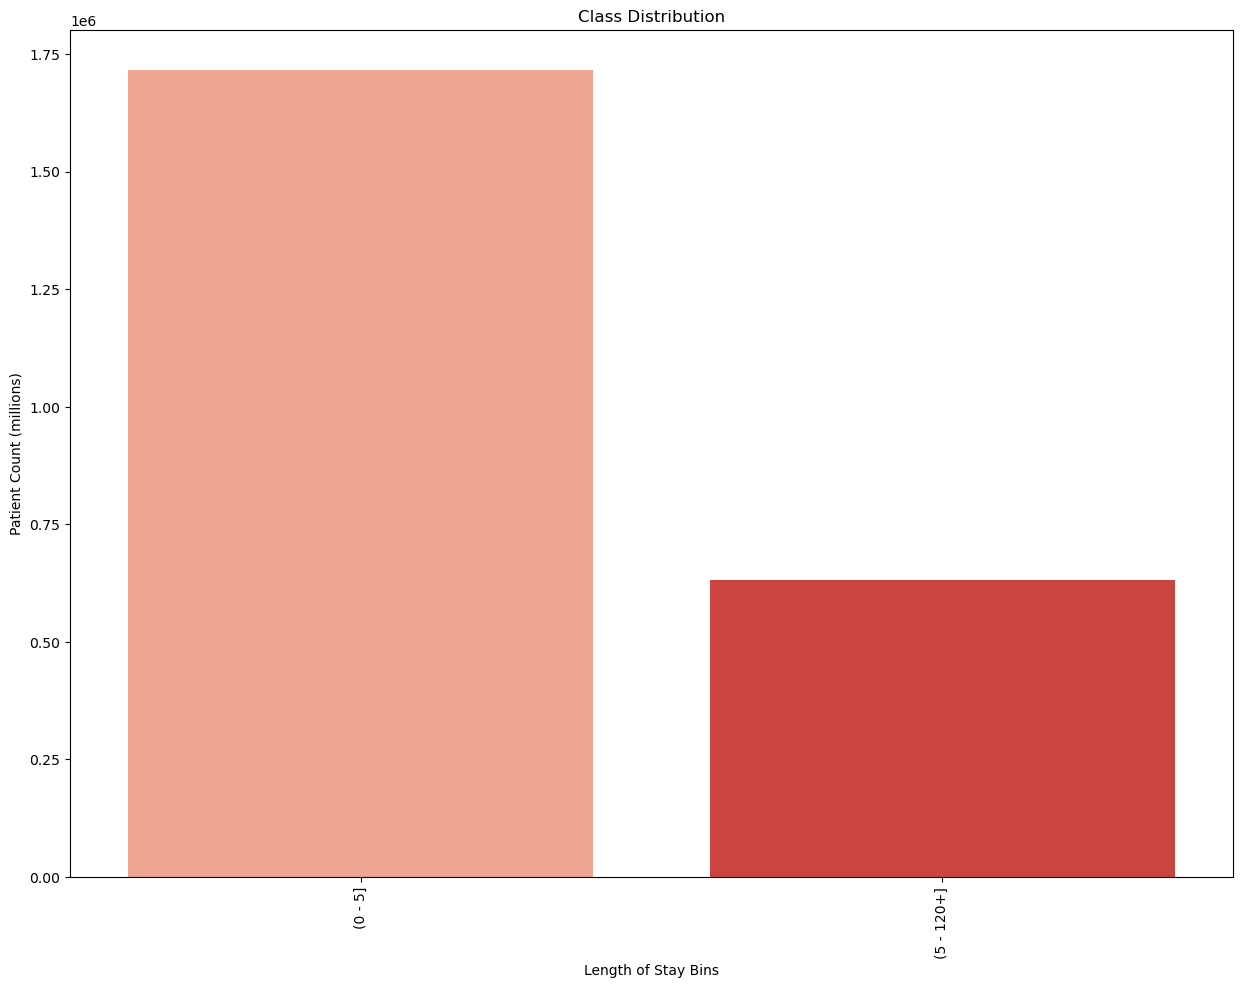

In [19]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = new_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

C:\Users\shrey\AppData\Local\Temp\ipykernel_17704\1637922886.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Train Accuracy: 0.8176931215127583
Test Accuracy: 0.8166781715967423


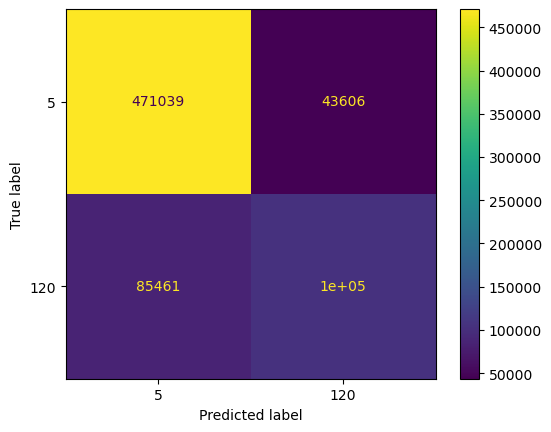

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=test_predictions);

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gb.fit(x_train, y_train)

train_predictions = gb.predict(x_train)
test_predictions = gb.predict(x_test)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.8176438146695771
Test Accuracy: 0.8080224871670317


In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(x_train, y_train)

train_predictions = adaboost.predict(x_train)
test_predictions = adaboost.predict(x_test)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.8061388845939855
Test Accuracy: 0.8068009760725862


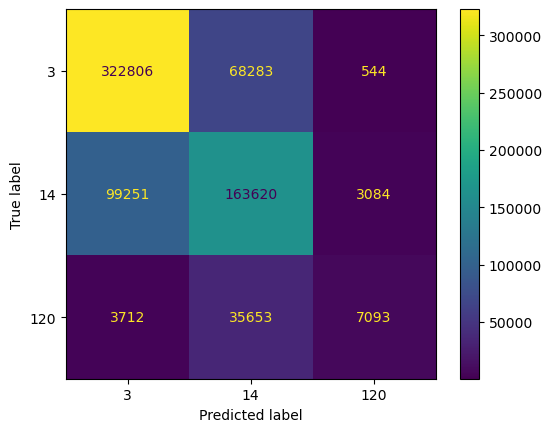

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=test_predictions);

### 4 bins  0, 3, 14, 120

In [25]:
bins = [0,3,14,120]
labels = [3,14,120]
new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(new_df)

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(3 - 14],14
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(3 - 14],14
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(3 - 14],14
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 3],3
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 3],3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 3],3
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 3],3
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 3],3
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 3],3


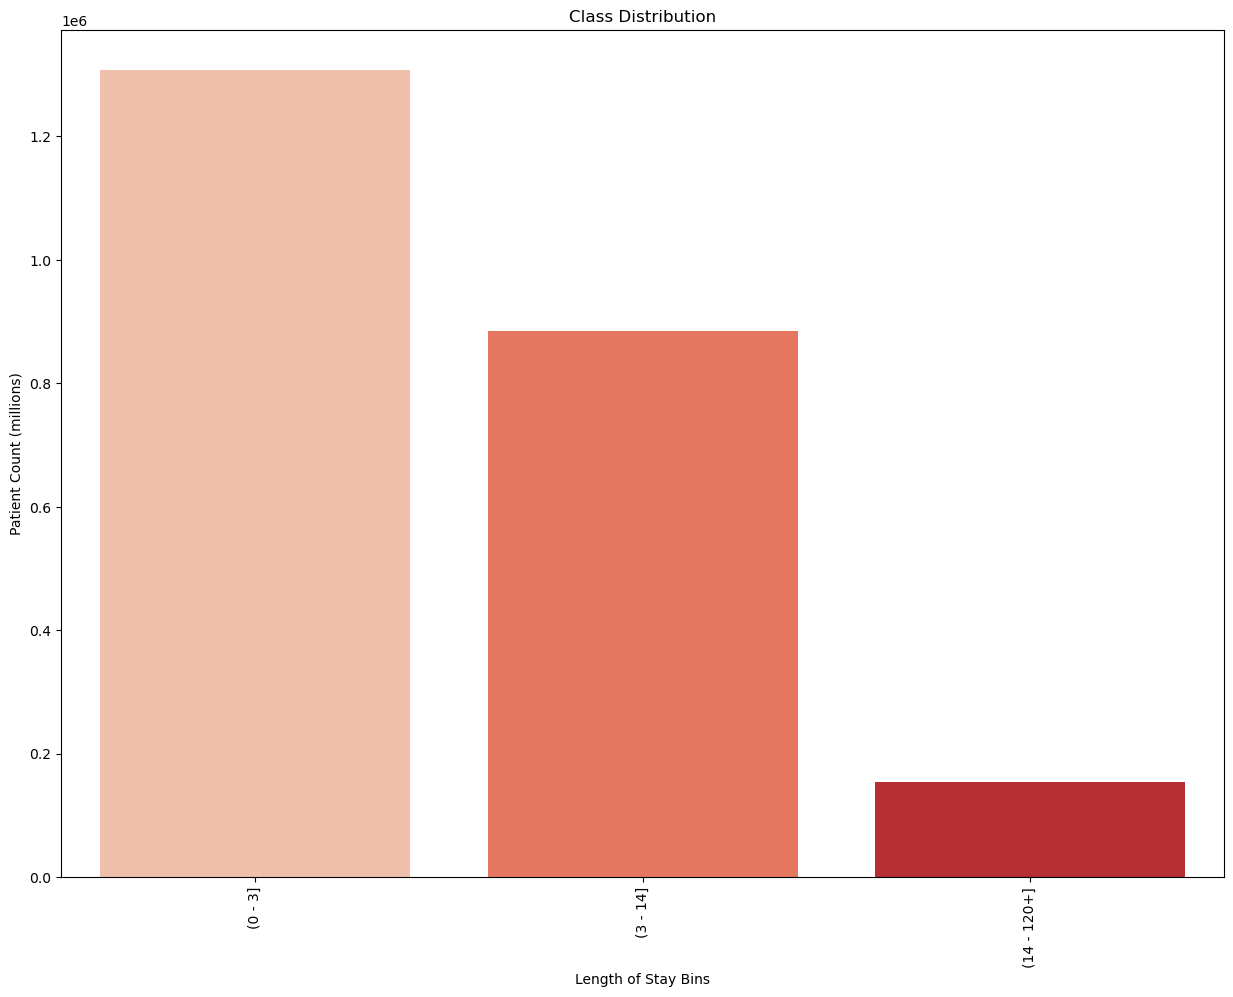

In [34]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = new_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

C:\Users\shrey\AppData\Local\Temp\ipykernel_17248\1637922886.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Train Accuracy: 0.6990486822898342
Test Accuracy: 0.6987796251949446


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gb.fit(x_train, y_train)

train_predictions = gb.predict(x_train)
test_predictions = gb.predict(x_test)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.7026079058957593
Test Accuracy: 0.7009755044414712


### Many bins

In [38]:
bins = [0,5,10,20,30,50,120]
labels = [5,10,20,30,50,120]

new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(new_df)

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 5],5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 5],5
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 5],5
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 5],5
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 5],5


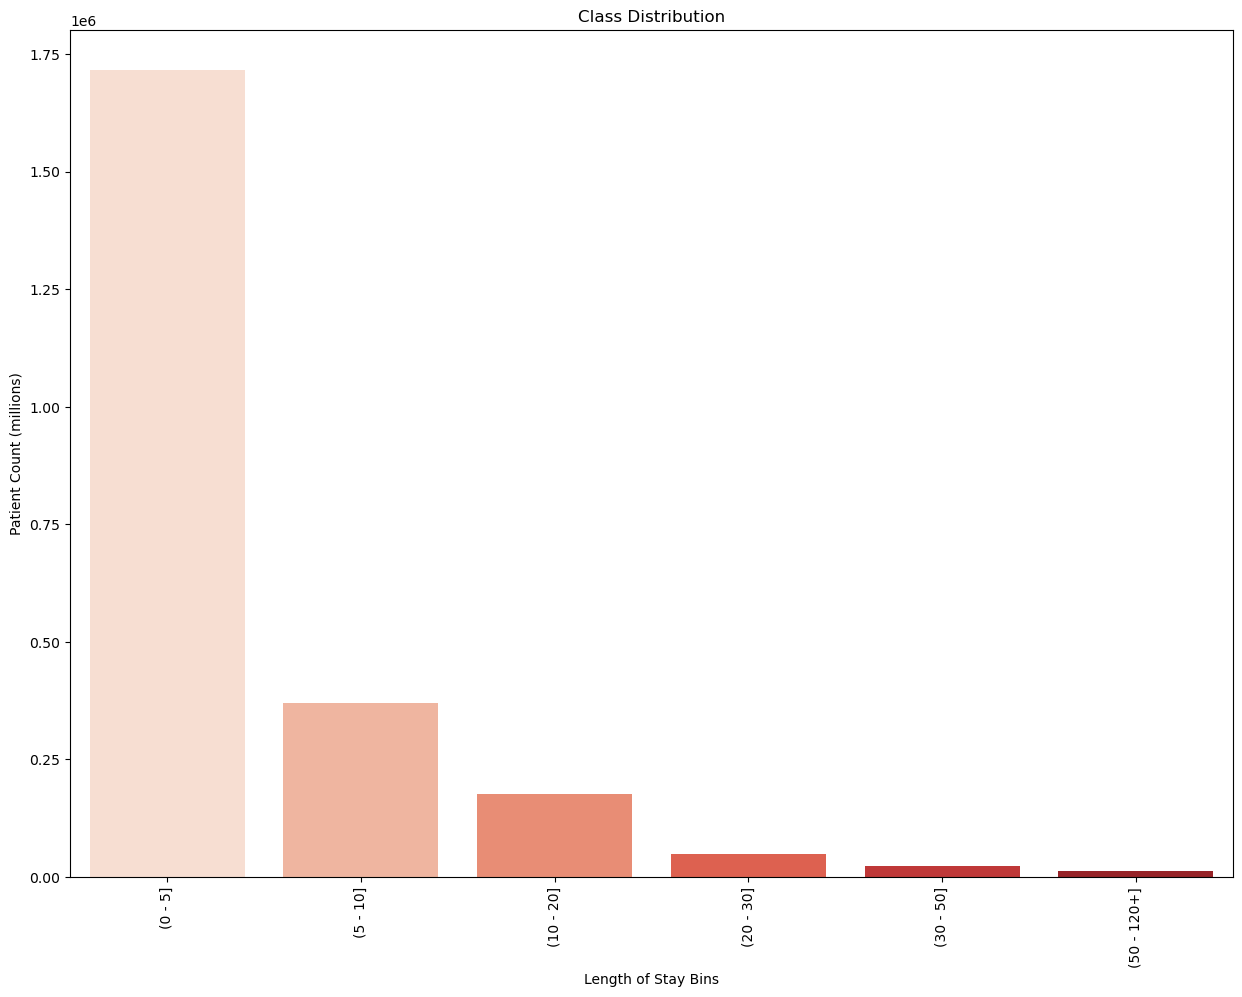

In [39]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = new_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

C:\Users\shrey\AppData\Local\Temp\ipykernel_17704\1637922886.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Train Accuracy: 0.7482276929145457
Test Accuracy: 0.7471273183854464


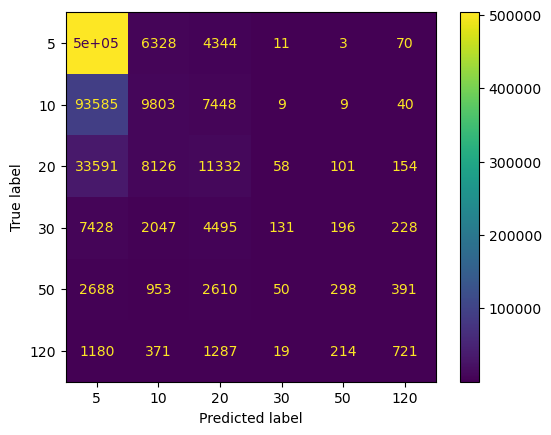

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=test_predictions);

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.7321197762646191
Train accuracy: 0.731596068601037


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gb.fit(x_train, y_train)

train_predictions = gb.predict(x_train)
test_predictions = gb.predict(x_test)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.7519530988437849
Test Accuracy: 0.7499865065634916


### 0,6,12,30,120

In [12]:
bins = [0,6,12,30,120]
labels = [6,12,30,120]

new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(new_df)

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 6],6
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 6],6
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6


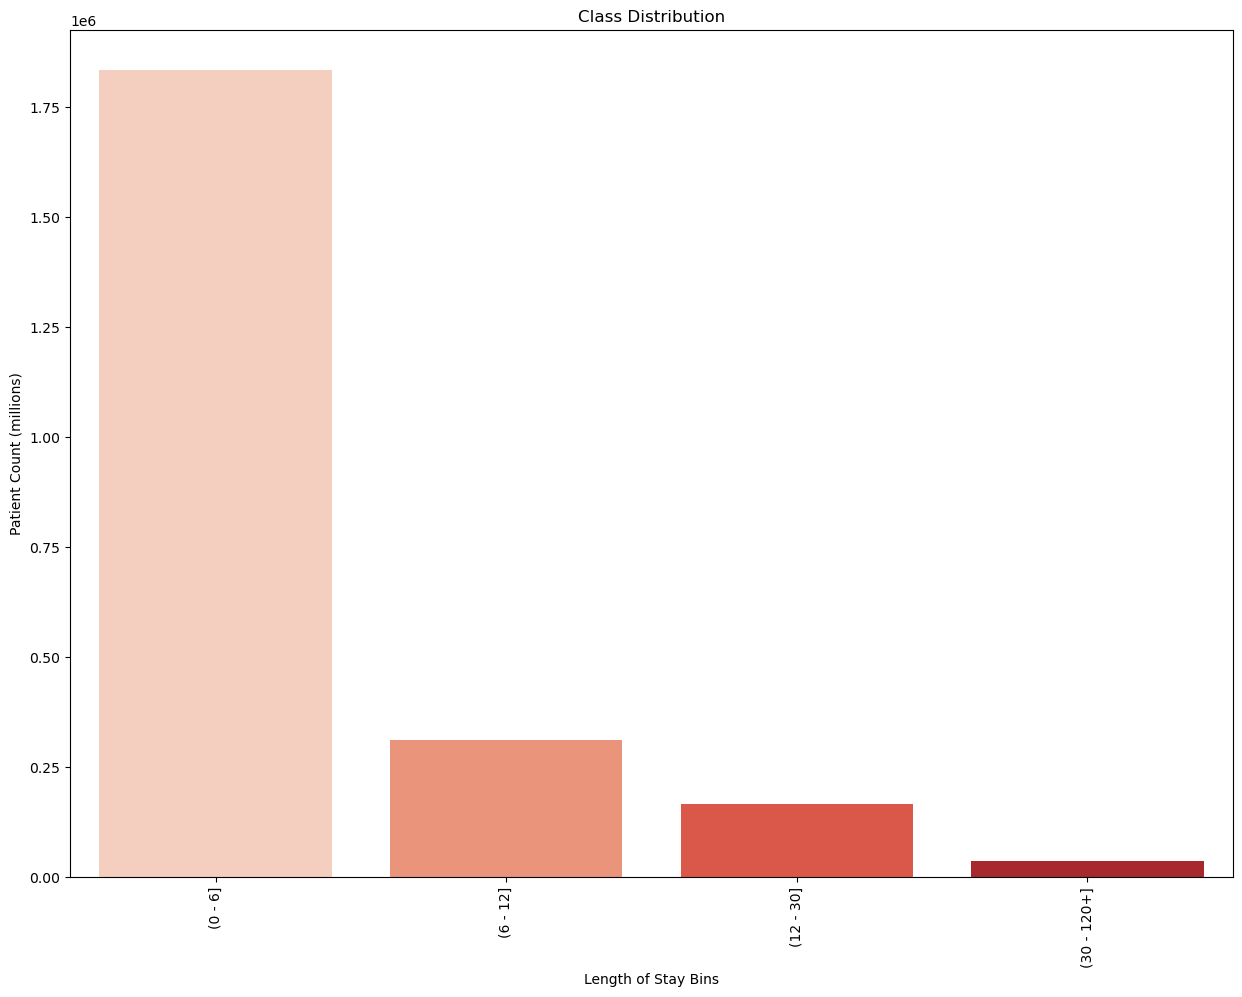

In [15]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = new_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gb.fit(x_train, y_train)

train_predictions = gb.predict(x_train)
test_predictions = gb.predict(x_test)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.8007090445794735
Test Accuracy: 0.8009817540331171


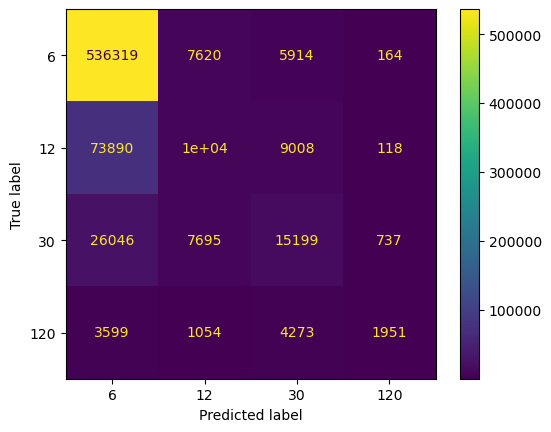

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=test_predictions);

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
}

# Create the Random Forest Classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Retrieve the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.7977762006118626


### 0,3,6,12,30,120

In [21]:
bins = [0,3,6,12,30,120]
labels = [3,6,12,30,120]

new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(new_df)

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(3 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(3 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(3 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 3],3
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 3],3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 3],3
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 3],3
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 3],3
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 3],3


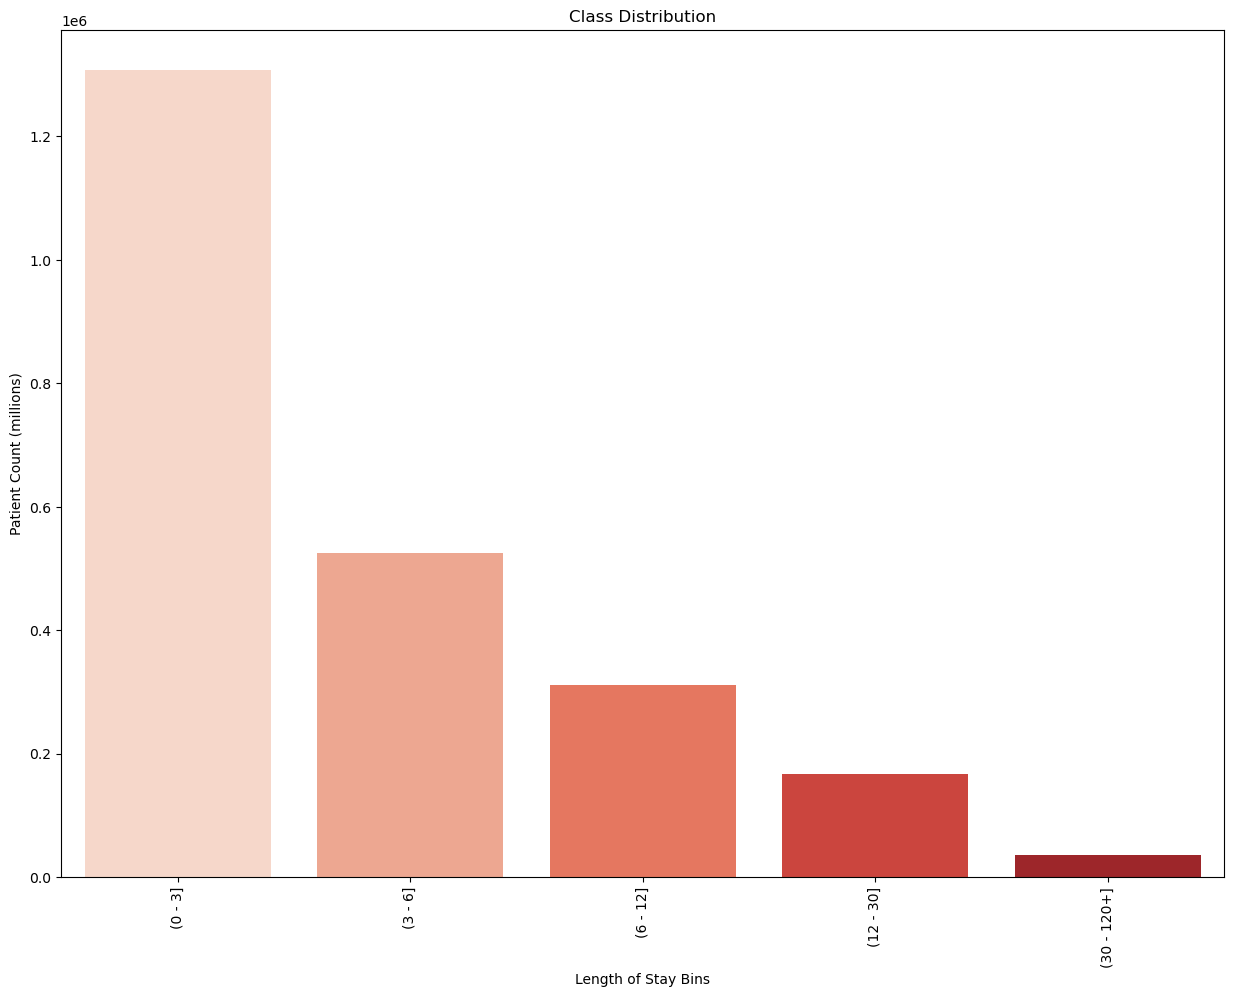

In [22]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = new_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.5759822511597253
Train accuracy: 0.575583738237883


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

C:\Users\shrey\AppData\Local\Temp\ipykernel_17568\1637922886.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Train Accuracy: 0.6126150036462715
Test Accuracy: 0.6117398579070118


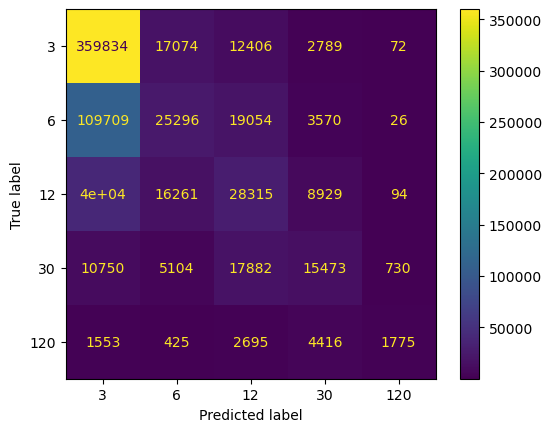

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=test_predictions);

## 0,6,12,30,120 cross val

In [10]:
bins = [0,6,12,30,120]
labels = [6,12,30,120]

new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(new_df)

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 6],6
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 6],6
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6


In [11]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
cv_acc = cross_val_score(clf, new_X, new_y, cv=5)
cv_acc

In [18]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 79.07%


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3)
cv_acc = cross_val_score(gb, new_X, new_y, cv=5)
cv_acc

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.79956494, 0.79537417, 0.79810765, 0.80109041, 0.80153356])

In [20]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 79.91%


## Cat boost


In [16]:
bins = [0,6,12,30,120]
labels = [6,12,30,120]

new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(new_df)

,Age Group,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator,stay_bin,stay_label
0,70 or Older,4,Urgent,122,0,139,4,2,Minor,Medicare,Y,(0 - 6],6
1,70 or Older,4,Elective,55,0,422,10,2,Moderate,Medicare,Y,(0 - 6],6
2,70 or Older,4,Urgent,122,202,139,4,1,Minor,Medicare,Y,(0 - 6],6
3,50 to 69,2,Elective,55,0,249,6,2,Minor,Medicare,Y,(0 - 6],6
4,70 or Older,2,Elective,122,0,139,4,1,Moderate,Medicare,Y,(0 - 6],6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,70 or Older,2,Emergency,112,0,47,1,2,Moderate,Medicare,Y,(0 - 6],6
2346927,50 to 69,1,Emergency,54,159,351,8,1,Minor,Private Health Insurance,Y,(0 - 6],6
2346928,50 to 69,2,Urgent,657,0,751,19,1,Minor,Medicaid,N,(0 - 6],6
2346929,70 or Older,1,Emergency,106,0,201,5,1,Moderate,Medicare,Y,(0 - 6],6


In [17]:
print(new_df.dtypes)

Age Group                           object
Length of Stay                       int64
Type of Admission                   object
CCS Diagnosis Code                   int64
CCS Procedure Code                   int64
APR DRG Code                         int64
APR MDC Code                         int64
APR Severity of Illness Code         int64
APR Risk of Mortality               object
Payment Typology 1                  object
Emergency Department Indicator      object
stay_bin                          category
stay_label                        category
dtype: object


In [20]:
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cb = CatBoostClassifier(n_estimators=200,
                       loss_function='MultiClass',
                       learning_rate=0.5,
                       depth=3,
                       random_state=1,
                       verbose=False)

numerical_features = new_df.select_dtypes(include=['int64']).columns
categorical_features = new_df.select_dtypes(include=['object','category']).columns
normalized_numerical = StandardScaler().fit_transform(df[numerical_features])
normalized_numerical_df = pd.DataFrame(normalized_numerical, columns=numerical_features)
normalized_df = pd.concat([normalized_numerical_df, new_df[categorical_features]], axis=1)
normalized_df.dropna()

new_X = normalized_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = normalized_df[['stay_label']]

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.30, random_state=1)

pool_train = Pool(X_train, y_train,
                  cat_features = ['Age Group', 'Type of Admission', 'APR Risk of Mortality', 'Payment Typology 1', 'Emergency Department Indicator'])

pool_test = Pool(X_test, cat_features = ['Age Group', 'Type of Admission', 'APR Risk of Mortality', 'Payment Typology 1', 'Emergency Department Indicator'])

cb.fit(pool_train)
y_pred = cb.predict(pool_test)

cb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", cb_accuracy)

CatBoostError: Invalid type for cat_feature[non-default value idx=2853,feature_idx=5]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.

## Trying bins

In [15]:
bins = [0,6,30,120]
labels = [6,30,120]

new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(new_df)

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 6],6
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 6],6
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6


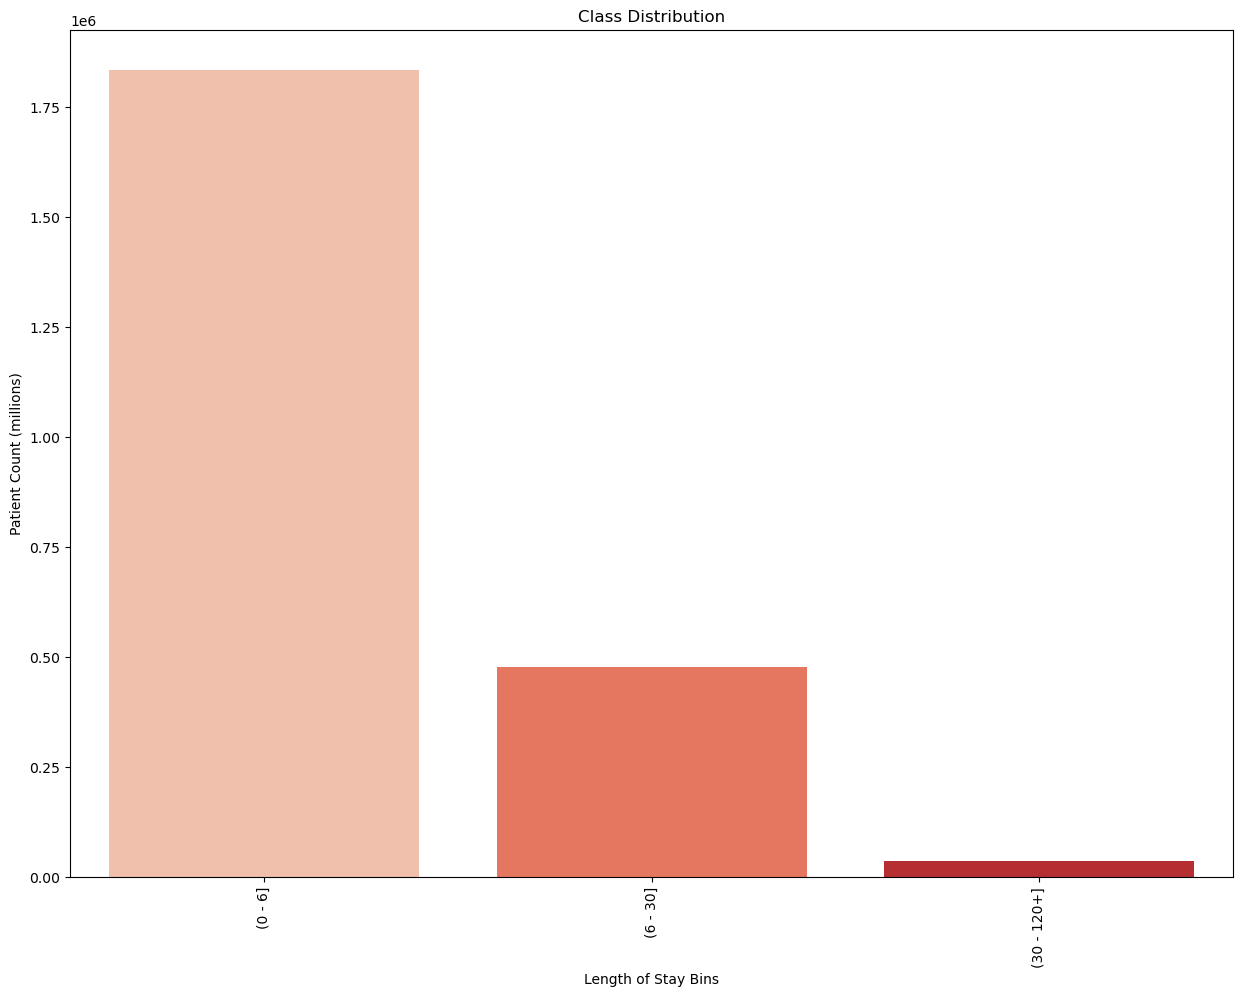

In [19]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = new_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

C:\Users\shrey\AppData\Local\Temp\ipykernel_15112\1637922886.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Train Accuracy: 0.8312208496116934
Test Accuracy: 0.8291290625896603


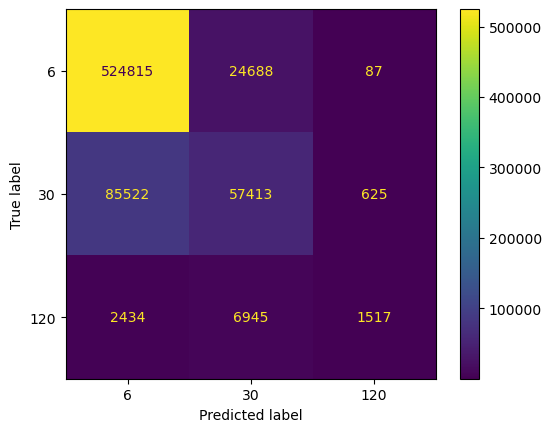

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=test_predictions);

In [11]:
bins = [0,6,14,120]
labels = [6,14,120]

new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(new_df)

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 6],6
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 6],6
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6


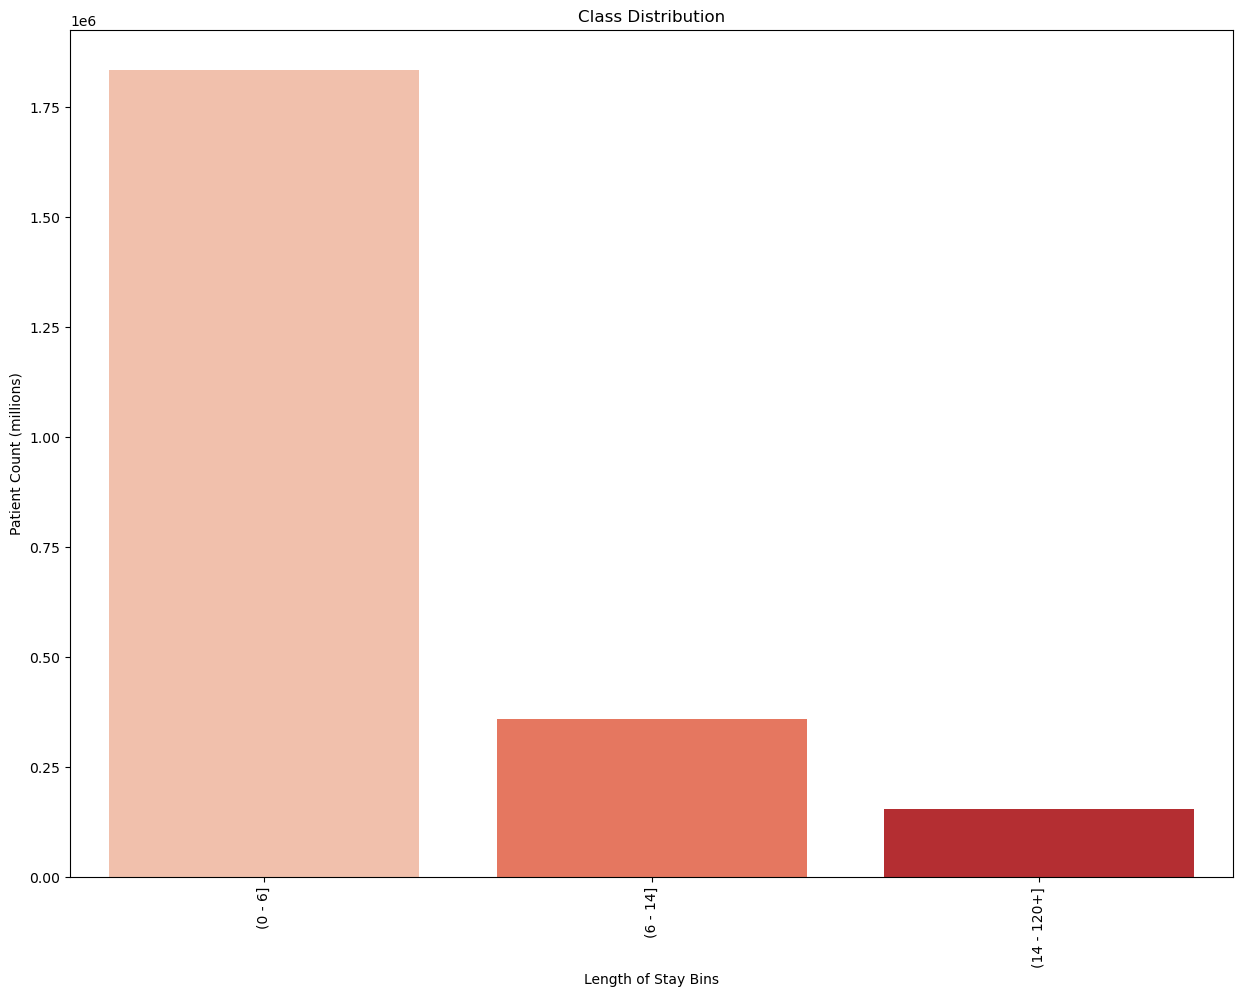

In [12]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = new_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

C:\Users\shrey\AppData\Local\Temp\ipykernel_20912\1637922886.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Train Accuracy: 0.8051229201338711
Test Accuracy: 0.8041321163673965


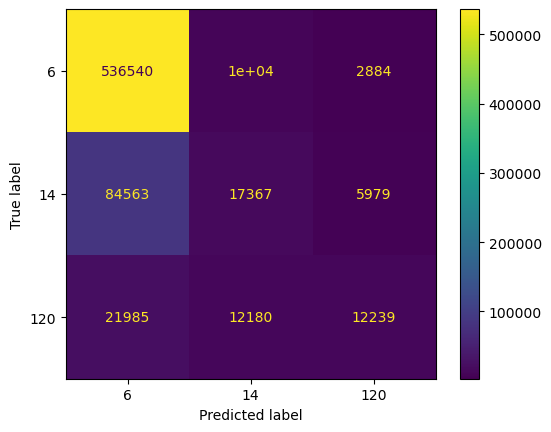

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=test_predictions);

## Catboost (6-120)

In [99]:
bins = [0,6,120]
labels = [6,120]
new_df['stay_bin'] = pd.cut(x = df['Length of Stay'], bins = bins)
new_df['stay_label'] = pd.cut(x = df['Length of Stay'], bins = bins, labels = labels)
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+'))
new_df

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 6],6
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 6],6
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6


In [104]:
unique_bins = new_df['stay_bin'].unique()
count = new_df['stay_label'].value_counts()

print(unique_bins)
print(count)

['(0 - 6]', '(6 - 120+]']
Categories (2, object): ['(0 - 6]' < '(6 - 120+]']
6      1832793
120     514027
Name: stay_label, dtype: int64


In [9]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

cb = CatBoostClassifier(n_estimators=100,
                       loss_function='MultiClass',
                       learning_rate=0.5,
                       depth=3,
                       random_state=1,
                       verbose=False)

new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.30, random_state=1)

pool_train = Pool(X_train, y_train,
                  cat_features = ['Age Group', 'Type of Admission', 'APR Risk of Mortality', 'Payment Typology 1', 'Emergency Department Indicator'])

pool_test = Pool(X_test, cat_features = ['Age Group', 'Type of Admission', 'APR Risk of Mortality', 'Payment Typology 1', 'Emergency Department Indicator'])

cb.fit(pool_train)
y_pred = cb.predict(pool_test)

import numpy as np
from sklearn.metrics import accuracy_score

cb2_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", cb2_accuracy)

Accuracy: 0.8494714833973916


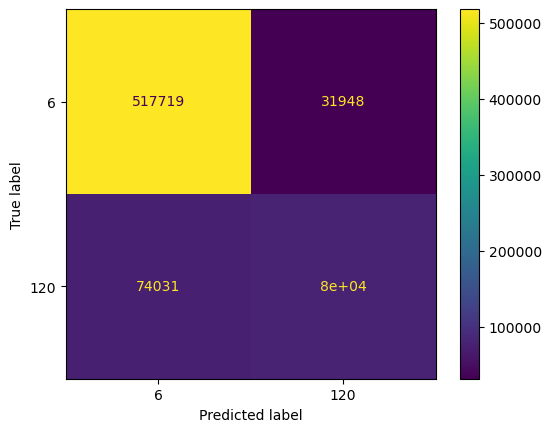

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_pred);

## 6-120 RF

In [69]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)

rf2_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:",rf2_accuracy)

C:\Users\shrey\AppData\Local\Temp\ipykernel_14036\1623503722.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Test Accuracy: 0.8418697073770748


## 6-120 GB

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gb.fit(x_train, y_train)

train_predictions = gb.predict(x_train)
test_predictions = gb.predict(x_test)

gb2_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:",gb2_accuracy)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.8424421131573789


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)

y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

lr2_accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy:', lr2_accuracy)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.8059402368595234


In [73]:
two_bins = {"rf": rf2_accuracy,
            "gb": gb2_accuracy,
            "cb": cb2_accuracy,
           "lr": lr2_accuracy}

## Comparing performances

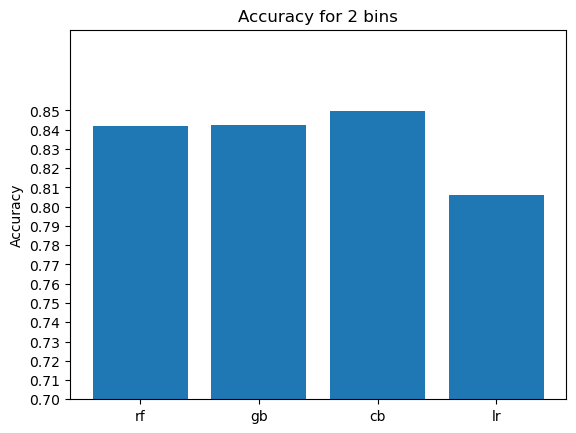

In [77]:
import matplotlib.pyplot as plt
import numpy as np

compare_metrics = {"rf": rf2_accuracy,
                    "gb": gb2_accuracy,
                    "cb": cb2_accuracy,
                  "lr": lr2_accuracy}
fig, ax = plt.subplots()
ax.bar(compare_metrics.keys(), compare_metrics.values())
ax.set(title="Accuracy for 2 bins", ylabel="Accuracy")
ax.set_ylim(0.7)  # Set the lower limit of the y-axis to 0.7

# Set the y-axis ticks with a step of 0.01
yticks = np.arange(0.7, max(compare_metrics.values()) + 0.01, 0.01)
ax.set_yticks(yticks)

plt.show()

## bins (6,30,120)
cb

In [87]:
bins = [0,6,30,120]
labels = [6,30,120]
new_df['stay_bin'] = pd.cut(x = df['Length of Stay'], bins = bins)
new_df['stay_label'] = pd.cut(x = df['Length of Stay'], bins = bins, labels = labels)
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+'))
new_df

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 6],6
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 6],6
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6


In [15]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

cb = CatBoostClassifier(n_estimators=100,
                       loss_function='MultiClass',
                       learning_rate=0.5,
                       depth=3,
                       random_state=1,
                       verbose=False)

new_X = df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.30, random_state=1)

pool_train = Pool(X_train, y_train,
                  cat_features = ['Age Group', 'Type of Admission', 'APR Risk of Mortality', 'Payment Typology 1', 'Emergency Department Indicator'])

pool_test = Pool(X_test, cat_features = ['Age Group', 'Type of Admission', 'APR Risk of Mortality', 'Payment Typology 1', 'Emergency Department Indicator'])

cb.fit(pool_train)
y_pred = cb.predict(pool_test)

import numpy as np
from sklearn.metrics import accuracy_score

cb3_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", cb3_accuracy)

Accuracy: 0.8377549194228786


In [88]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)

rf3_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:",rf3_accuracy)

C:\Users\shrey\AppData\Local\Temp\ipykernel_14036\3211748193.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Test Accuracy: 0.828739883473523


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gb.fit(x_train, y_train)

train_predictions = gb.predict(x_train)
test_predictions = gb.predict(x_test)

gb3_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:",gb3_accuracy)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.8307610582263091


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)

y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

lr3_accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy:', lr3_accuracy)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.7985202671416356


In [90]:
three_bins = {"rf": rf3_accuracy,
            "gb": gb3_accuracy,
            "cb": cb3_accuracy,
             "lr": lr3_accuracy}

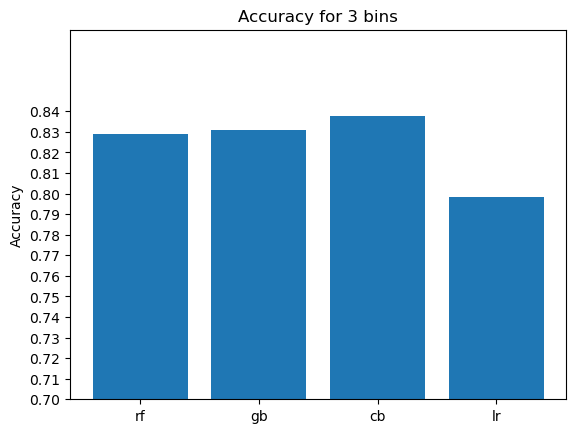

In [91]:
import matplotlib.pyplot as plt
import numpy as np

compare_metrics = {"rf": rf3_accuracy,
                    "gb": gb3_accuracy,
                    "cb": cb3_accuracy,
                      "lr": lr3_accuracy}
fig, ax = plt.subplots()
ax.bar(compare_metrics.keys(), compare_metrics.values())
ax.set(title="Accuracy for 3 bins", ylabel="Accuracy")
ax.set_ylim(0.7)  # Set the lower limit of the y-axis to 0.7

# Set the y-axis ticks with a step of 0.01
yticks = np.arange(0.7, max(compare_metrics.values()) + 0.01, 0.01)
ax.set_yticks(yticks)

plt.show()

## Bins (6,14,30,120)

In [83]:
bins = [0,6,14,30,120]
labels = [6,14,30,120]
new_df['stay_bin'] = pd.cut(x = df['Length of Stay'], bins = bins)
new_df['stay_label'] = pd.cut(x = df['Length of Stay'], bins = bins, labels = labels)
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+'))
new_df

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 6],6
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 6],6
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6


In [22]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

cb = CatBoostClassifier(n_estimators=100,
                       loss_function='MultiClass',
                       learning_rate=0.5,
                       depth=3,
                       random_state=1,
                       verbose=False)

new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.30, random_state=1)

pool_train = Pool(X_train, y_train,
                  cat_features = ['Age Group', 'Type of Admission', 'APR Risk of Mortality', 'Payment Typology 1', 'Emergency Department Indicator'])

pool_test = Pool(X_test, cat_features = ['Age Group', 'Type of Admission', 'APR Risk of Mortality', 'Payment Typology 1', 'Emergency Department Indicator'])

cb.fit(pool_train)
y_pred = cb.predict(pool_test)

import numpy as np
from sklearn.metrics import accuracy_score

cb4_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", cb4_accuracy)

Accuracy: 0.8054502120600074


In [84]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gb.fit(x_train, y_train)

train_predictions = gb.predict(x_train)
test_predictions = gb.predict(x_test)

gb4_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:",gb4_accuracy)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.8022657610440227


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)

rf4_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:",rf4_accuracy)

C:\Users\shrey\AppData\Local\Temp\ipykernel_14036\3786011745.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Test Accuracy: 0.7981665970689416


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)

y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

lr4_accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy:', lr4_accuracy)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.7841376841854083


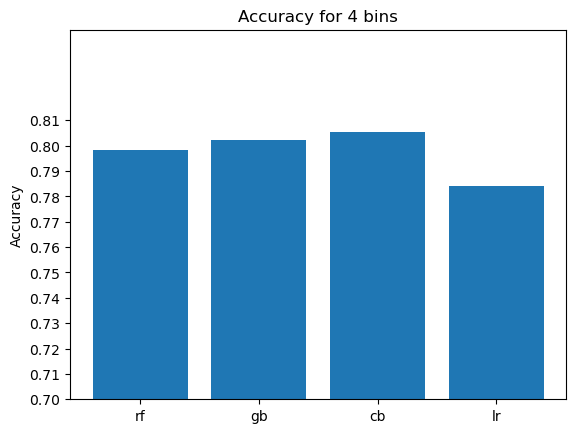

In [86]:
import matplotlib.pyplot as plt
import numpy as np

compare_metrics = {"rf": rf4_accuracy,
                    "gb": gb4_accuracy,
                    "cb": cb4_accuracy,
                    "lr": lr4_accuracy}
fig, ax = plt.subplots()
ax.bar(compare_metrics.keys(), compare_metrics.values())
ax.set(title="Accuracy for 4 bins", ylabel="Accuracy")
ax.set_ylim(0.7)  # Set the lower limit of the y-axis to 0.7

# Set the y-axis ticks with a step of 0.01
yticks = np.arange(0.7, max(compare_metrics.values()) + 0.01, 0.01)
ax.set_yticks(yticks)

plt.show()


In [93]:
four_bins = {"rf": rf4_accuracy,
            "gb": gb4_accuracy,
            "cb": cb4_accuracy,
            "lr": lr4_accuracy}

## Comparing performance of various bins

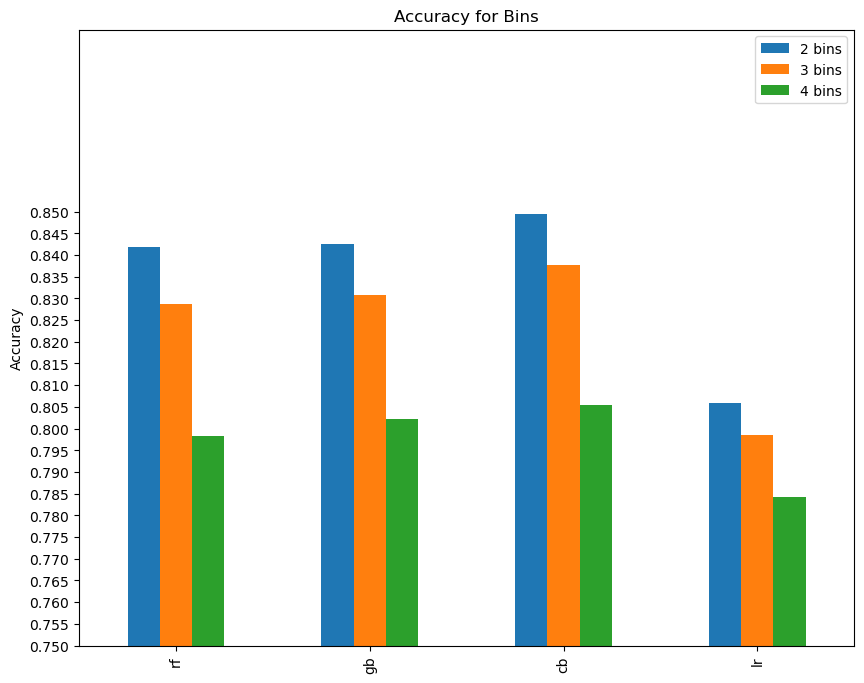

In [94]:
compare_metrics = pd.DataFrame({"2 bins": two_bins,
                                "3 bins": three_bins,
                                "4 bins": four_bins})

fig, ax = plt.subplots(figsize=(10, 8))
compare_metrics.plot.bar(ax=ax)
ax.set(title="Accuracy for Bins", ylabel="Accuracy")
ax.set_ylim(0.75)  # Set the lower limit of the y-axis to 0.7

# Set the y-axis ticks with a step of 0.01
yticks = np.arange(0.75, compare_metrics.values.max() + 0.005, 0.005)
ax.set_yticks(yticks)

plt.show()